# **Reinforcement Learning and Loss of Plasticity Phenomenon in Coverage Path Planning Environment**

# **Introduction**

Coverage Path Planning (CPP) refers to the problem of generating a trajectory that allows a mobile agent—such as a cleaning robot, drone, or inspection vehicle—to visit every point in a  map region efficiently. Unlike shortest‐path problems, CPP requires systematically covering an area without gaps or unnecessary overlap, especially in multi-agent environments.

Recent advances in deep reinforcement learning (RL) have achieved great performance across many environments, yet these methods typically face a big challenge when attempting at  a continual stream of new tasks that have small differences. An example of this limitation is “loss of plasticity,” whereby a deep network’s capacity to learn diminishes as it encounters successive learning problems. [Dohare et al. (2024)](https://www.nature.com/articles/s41586-024-07711-7) demonstrate that standard deep‐learning algorithms—both in supervised and reinforcement‐learning settings—gradually lose their ability to adapt, performing no better than shallow models after extended continual learning. 

In their study, a reinforcement learning environment is tested, in which "a simulated ant-like robot tasked with moving forwards as
rapidly and efficiently as possible". However, it is unclear whether the loss of plasticity phenomenon is also present in coverage path planning (CPP) environments, especially with the use of curriculum learning, a training strategy that involves gradually increasing the difficulty of tasks to improve learning efficiency. This study aims to investigate this phenomenon in the context of CPP, where the agent must learn to navigate and cover different layouts of a map. As a starting point, we will only cover single-agent CPP, where the agent is tasked with covering a single map layout alone.

Therefore, our project has the following main objectives to **study CPP, curriculum learning, and loss of plasticity**:

* **Environment Development**: To create and release a reproducible `Gym` environment for *single‐agent* CPP, enabling further research in coverage tasks.

* **Curriculum Learning Evaluation**: To investigate whether loss of plasticity also occurs in curriculum learning in a CPP environment and if curriculum learning mitigates or exacerbates it.

* **Benchmarking**: To compare rewards against a greedy algorithm (A\*) planner as a gold‐standard baseline, measuring the performance gap and identifying if reinforcement learning may offer complementary advantages.

---

# **Methodology**

## **Understanding the Environment and its Rewards**

The environment is a 2D grid world where the agent can move in four directions: up, down, left, and right. There are 3 different types of tiles: 
- **Empty tiles**: The agent can move freely on these tiles.
- **Wall tiles**: The agent cannot move through these tiles.
- **Goal tile**: The agent receives a reward of +1 when it reaches this tile.

The agent starts at a random position on the grid and must visit all goal tiles, making this a CPP (Coverage Path Planning) problem. The agent receives a reward of +2 for each goal tile it visits and a penalty of -1 for each step it takes to encourage shorter paths.

#### **Reward function:**

```python
        # Default baseline reward
        reward = -1

        # Check validity and apply penalties
        if not (0 <= ni < self.H and 0 <= nj < self.W and self.grid[ni, nj] == 0):
            # Invalid action: stay in place
            self.agent_pos = (i, j) 
        else:
            # Valid move: update position
            self.agent_pos = (ni, nj)

        # Check if on a target
        if self.agent_pos not in self.visited:
            if self.agent_pos in self.targets:
                reward = 2   # new target
            self.visited.add(self.agent_pos)
```

## **Levels**

The environment consists of 5 levels, all with the same grid size but with a changing number of goal tiles and walls. The levels are designed to increase in difficulty, with the first level being the easiest and the last level being the hardest. The levels are as follows, with the target tiles represented in green, the walls in black, and the empty tiles in white:

**Level 1**:

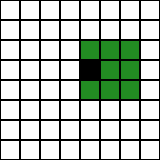

**Level 2**:

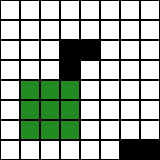

**Level 3**:

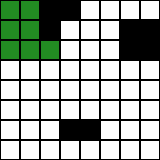

**Level 4**:

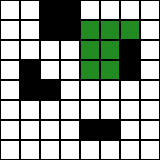

**Level 5**:

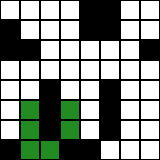

## **Baseline A\* Algorithm**

The A* algorithm is a well-known pathfinding algorithm that finds the shortest path from the start node to the goal node. It uses a heuristic function to estimate the cost of reaching the goal from the current node. The A* algorithm is used as a baseline to compare the performance of the reinforcement learning models.

**a_star_test.ipynb**

## **Models Used**

### **DQN (Deep Q-Network)**

The DQN algorithm is a reinforcement learning algorithm that uses a neural network to approximate the Q-value function. The Q-value function is used to estimate the expected future rewards for each action taken in a given state. The DQN algorithm uses experience replay and target networks to stabilize training and improve performance.

**dqn_mlp_test.ipynb** 

### **PPO (Proximal Policy Optimization) w/o L2 Regularization**

PPO is a policy gradient method that optimizes the policy directly. It uses a clipped objective function to ensure that the policy update does not deviate too much from the previous policy, which helps to stabilize training.

**ppo_mlp_test.ipynb**

### **PPO (Proximal Policy Optimization) w/ L2 Regularization**

This is the same as the previous PPO model but with L2 regularization added to the loss function. L2 regularization helps to prevent overfitting by adding a penalty for large weights in the model.

**ppo_mlp_l2_test.ipynb**

## **Policy Used**

### **Mlp Policy**

The MlpPolicy is a multi-layer perceptron (MLP) policy that uses fully connected layers to process the input state and output the action probabilities. The MlpPolicy is used in both the DQN and PPO models.


## **Working Agent Example**

In [3]:
import pygame
from stable_baselines3 import DQN
from coverage_env import CoverageEnv
from pygame_renderer import PygameRenderer

pygame.init()

env = CoverageEnv(curriculum=1)
model = DQN.load("models/dqn/mlp/coverage_lvl1.zip", env=env)
renderer = PygameRenderer(env, tile_size=50)

obs, _info = env.reset()
done = False

try:
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                raise KeyboardInterrupt()

        # predict returns an array; convert to int
        raw_action, _ = model.predict(obs, deterministic=True)
        action = int(raw_action)  

        obs, reward, terminated, truncated, _info = env.step(action)
        done = terminated or truncated

        renderer.render()

        if done:
            obs, _info = env.reset()
            done = False

except KeyboardInterrupt:
    pass
finally:
    renderer.close()
    print("Renderer closed, notebook run complete.")


/home/joaolucasmbc/mambaforge/envs/rl-cpp/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/home/joaolucasmbc/mambaforge/envs/rl-cpp/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Renderer closed, notebook run complete.


---

# **Results**

After succesfully creating a `gym` environment and training the agent using the DQN and PPO algorithms, we can visualize the results to understand:

* Is the agent learning at all?  
* With curriculum learning, is the agent learning faster? Or is loss of plasticity also a problem for curriculum learning?  
* Finally, is the agent able to solve the problem like the Gold Standard of the A* algorithm? What is the advantage of using Reinforcement Learning x Greedy Algorithms?

## **Training Results**

For each one of the three model architectures tested, the following process was used to train and evaluate the agent:

1. Train the agent on the first level for a sufficient amount of timesteps to completely learn the level.

2. Evaluate the agent on the second level to see if it can generalize to the new level.

3. Re-train the agent on the second level, with the same amount of timesteps and without exploration, to see if the previous training was effective or lost of plasticity would affect the learning.

4. Evaluate the agent on all levels to see if any improvements were made to its performance, and if it forgot the previous levels.

5. Repeat steps 2-4 for the third, fourth, and fifth levels.

6. Finally, create a complete graph of the agent's reward over time for each level.

In this way, we were able to analyze the overall performance of each model in this problem.

### 1. **DQN (Deep Q-Network)**

As the simplest model of the three, the DQN model was trained first. The graph of the agent's reward over time is shown below (more details on each step of the training can be found on [its notebook](./dqn_mlp_test.ipynb)). The hyperparameters used were based on research of similar problems, as it was not the main focus of this study.

![image.png](./assets/dqn_rewards.png)

The agent was able to learn the first level in 1,000,000 timesteps and achieved a stable reward, independent of the starting position. However, when evaluated on the second level, the agent was unable to generalize and achieved a very negative reward. Unfortunately, even with a slightly harder level, the agent was unable to re-utilize its knowledge. A possible explanation for this phenomenon could be the fact that the model's input is the entire grid and not a limited view of the agent's surroundings. This could cause the model to not be able to generalize for being too stuck in the complete map (a possible follow-up study could analyze if this theory holds true).

The agent was then re-trained on the second level (still for 1,000,000 timesteps) without exploration, and it was able to achieve a stable reward. However, as seen in the graph, its training was slightly less stable and it took more time to converge, a possible indication of loss of plasticity.

After this, it was evaluated on all levels, and the result was not very promising. The agent was able to achieve a stable reward on the second level, but it was unable to generalize to the other levels and completely forgot the first level.

Continuing for the next levels, the exact same behavior was observed. Furthermore, each time the agent took longer to converge and the training was less stable. This is a big indication of loss of plasticity, as described by Dohare S, et al. in their paper [Loss of plasticity in deep continual learning](https://www.nature.com/articles/s41586-024-07711-7). While in their RL experiment, the environment (one of a spider trying to move) did not change but only the friction of the ground, in our case the map was changed, as described in our **curriculum learning approach**. 

Therefore, the DQN model shows strong evidence of the presence of loss of plasticity in curriculum learning, especially in the last level, where the agent was unable to learn anything at all.

The next models were chosen based on the *Loss of Plasticity* paper, which showed that the use of PPO, and then PPO with L2 regularization helped to mitigate the problem.

### **2. PPO (Proximal Policy Optimization) w/o L2 Regularization**

For the training of the PPO model, the same process was followed as for the DQN model. In this case, 500,000 timesteps were enough for the agent to learn the first level. Regarding hyperparameters, the ones used were obtained from a research of other uses of PPO to similar problems, as it was not the focus of this study, but we did not want to use the default ones.

The graph of the agent's reward over time is shown below (more details on each step of the training can be found on [its notebook](./ppo_mlp_test.ipynb)).

![image.png](./assets/ppo_rewards.png)

The behavior of the agent was very similar to that of the DQN model. The agent was able to learn the first level and achieve a stable reward, but when evaluated on the second level, it was unable to generalize. After re-training without exploration on any other level, the agent was able to achieve a stable reward, but forgot the older levels.

However, a few improvements could be seen. Differently from the DQN model, the PPO agent was able to learn more of the last level, even though it was not able to achieve a stable reward. This could be an indication that the PPO model is more robust to loss of plasticity, but probably some of the starting positions the model was still unable to learn.

### **3. PPO w/ L2 Regularization**

Lastly, the difference between the regular PPO and the one with L2 regularization was tested. L2 regularization is a technique used to prevent overfitting by adding a penalty for large weights in the model. This technique was shown to help mitigate loss of plasticity in the paper mentioned above, and therefore it was tested in this study. The same hyperparameters were used as in the previous PPO model, but with the addition of L2 regularization to the loss function.

The same process was followed, and the graph of the agent's reward over time is shown below (more details on each step of the training can be found on [its notebook](./ppo_mlp_l2_test.ipynb)).

![image.png](./assets/ppo_l2_rewards.png)

The behavior of the agent was the same as the regular PPO. No improvements were seen in the convergence speed, ability to generalize, or stability of the training. Furthermore, the success level in the last level was extremely similar to the previous PPO model. This could be an indication that the L2 regularization did not help to mitigate loss of plasticity in this problem.

## **Which model was the best?**

To be able to compare the three models, we plotted the average reward of each model over all levels. The graph below shows the average reward of each model over all levels, with the DQN model in blue, the PPO model in orange, and the PPO with L2 regularization in green.

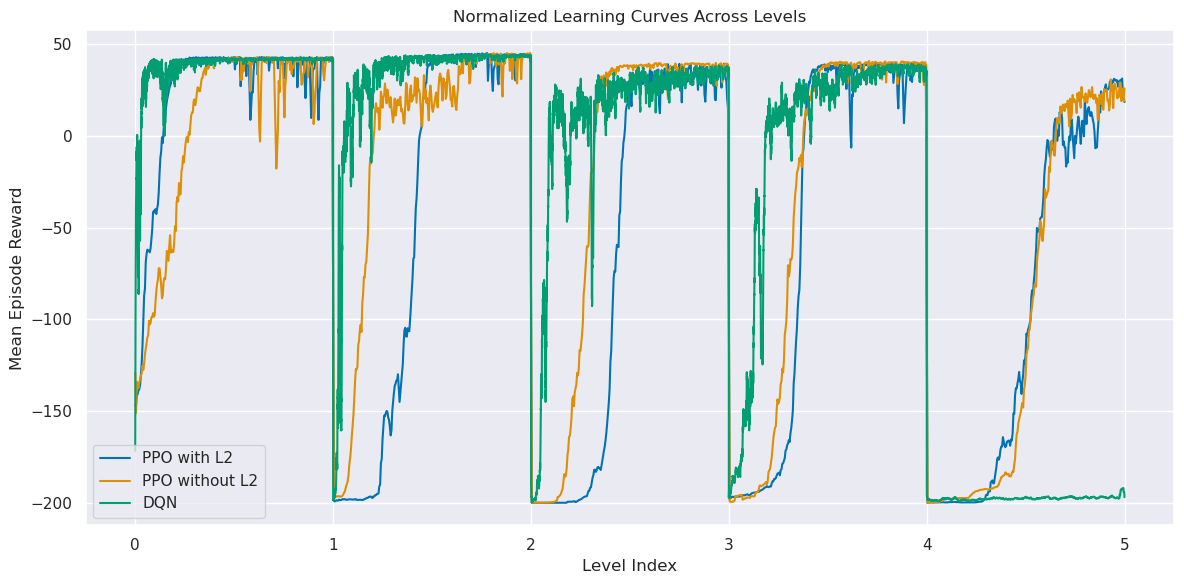

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Set seaborn theme
sns.set_theme(style="darkgrid", palette="colorblind")

def load_normalized_rewards(log_dir):
    run_dirs = sorted(
        [d for d in os.listdir(log_dir) if d.startswith("coverage_")],
        key=lambda x: int(x.split("lvl")[-1])
    )

    all_x, all_y = [], []
    level_index = 0

    for run in run_dirs:
        if "ppo" in log_dir:
            path = os.path.join(log_dir, run, "PPO_1")
        else:
            path = os.path.join(log_dir, run, "DQN_1")

        if not os.path.exists(path):
            continue

        ea = EventAccumulator(path)
        ea.Reload()

        scalars = ea.Scalars("rollout/ep_rew_mean")
        steps = [e.step for e in scalars]
        rewards = [e.value for e in scalars]

        # Normalize x to the current level
        norm_x = np.linspace(level_index, level_index + 1, num=len(steps))
        all_x.extend(norm_x)
        all_y.extend(rewards)
        level_index += 1

    return np.array(all_x), np.array(all_y)

# Configs
configs = {
    "PPO with L2": "logs/ppo/mlp/l2",
    "PPO without L2": "logs/ppo/mlp/no_l2",
    "DQN": "logs/dqn/mlp"
}

# Plot
plt.figure(figsize=(12, 6))

for label, path in configs.items():
    x, y = load_normalized_rewards(path)
    sns.lineplot(x=x, y=y, label=label)

plt.xlabel("Level Index")
plt.ylabel("Mean Episode Reward")
plt.title("Normalized Learning Curves Across Levels")
plt.legend()
plt.tight_layout()
plt.show()


*OBS: the learning curves are "normalized", such that each level starts and ends at the same x coordinate of the graph.*

Considering this graph and all the analysis, we were able to draw the following conclusions:

1. None of the models were able to generalize well and bring the knowledge from the previous levels to the next ones.

2. The DQN model was the worst of the three, given that each level took double the amount of timesteps to converge, and the agent was unable to learn the last level at all.

3. All models showed signs of loss of plasticity, given that the learning of the next level was always progressively slower and less stable.

4. PPO was able to mitigate loss of plasticity, as it was able to learn more of the last level than the DQN model. However, it was still unable to generalize well and bring the knowledge from the previous levels to the next ones.

5. L2 regularization was not a deciding factor on loss of plasticity in this problem, as the PPO model and the one with L2 regularization had very similar results to the one without it.  

6. Compared to the Gold Standard of the A* algorithm, all models achieved an average reward that was extremely close. However, using the `pygame` visualization, it is possible to see that the model usually do not take the best path once inside the coverage tiles, which shows a possible a flaw of RL in a single-agent environment. The agent was able to find the best path to the goal tiles, but once inside, it was always one or two points of reward behind the gold standard.

---

## **Conclusions and Next Steps**

With the results of the study, we can answer the initial questions:

### 1. **Is the agent learning at all?**

Yes! The agent was able to learn the first level and achieve a stable reward. However, it was unable to generalize to the next levels and bring the knowledge from the previous levels to the next ones. Furthermore, the last level, for instance, was extremely hard for the agent to learn, especially with the DQN model.

### 2. **With curriculum learning, is the agent learning faster? Or is loss of plasticity also a problem for curriculum learning?**

Comparing to the results of individual models in the [model_per_level notebook](./model_per_level.ipynb), curriculum learning does not seem to be helpful in this environment, changing the layout for each level. 

Loss of plasticity was observed to be a problem, as the agent's learning showed to get worse from level to level. This conclusion aligns with the findings of the paper [Loss of plasticity in deep continual learning](https://www.nature.com/articles/s41586-024-07711-7), and it is interesting to see that the same behavior was observed in a environment that changes the layout, and not only the friction of the ground, as in their experiment.

### 3. **Is the agent able to solve the problem like the Gold Standard of the A\* algorithm? What is the advantage of using Reinforcement Learning x Greedy Algorithms?**

The agents achieved an average reward that was extremely close to the Gold Standard of the A* algorithm, but always closely behind, as discussed previously.

In this way, it is a solid conclusion that, for **single-agent environments** similar to this, the A* algorithm is a better choice than reinforcement learning. 

However, the advantage of RL could be highlighted in multi-agent environments. In this case, it is also important to learn to cooperate and coordinate with other agents to achieve a common goal, which is a limitation of greedy algorithms, that are solely focused on finding the best path to the goal.

This is a possible follow-up study that could be done with this environment, as it would be interesting to see how the agents would behave in a multi-agent environment. Given the format of our `gym` environment, it would be easy to add more agents and see how they would behave in a multi-agent environment.